In [112]:
from datasets import Audio, Dataset, load_dataset, load_metric

def evaluate(model_name):
    # compute metrics
    wer_result = 55.6
    cer_result = 34.97634

    return {'wer': wer_result, 'cer': cer_result, 'model_name': model_name}

In [113]:
def get_metadata(file_number):
    # Read Text Files with Pandas using read_csv()
  
    # importing pandas
    import pandas as pd
  
    # read text file into pandas DataFrame
    metadata = pd.DataFrame(pd.read_csv("recordings_NL.txt", sep='\t', header=0, names=['Root', 'SpeakerID', 'Component', 'Group', 'Age', 'Gender', 'CEF', 'DialectRegion', 'Duration (seconds)', 'Duration (days)']))
    suptitle = metadata.loc[metadata['Root'] == file_number]
    txt = "Group: {group}, Age: {age}, Gender: {gender}, CEF: {cef}, DialectRegion: {dialectregion}"
    txt = txt.format(group = suptitle['Group'].iloc[0], age = suptitle['Age'].iloc[0], gender=suptitle['Gender'].iloc[0], cef=suptitle['CEF'].iloc[0], dialectregion=suptitle['DialectRegion'].iloc[0])
    return txt

get_metadata('fn000151')

'Group: 1, Age: 8.0, Gender: F, CEF: nan, DialectRegion: N4a'

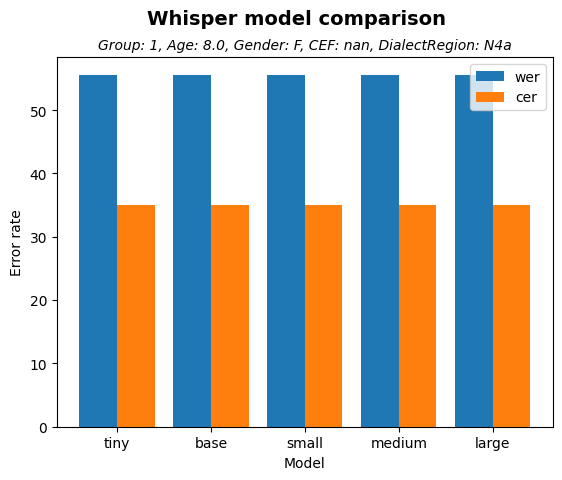

In [114]:
data_tiny = evaluate("tiny")
data_base = evaluate("base")
data_small = evaluate("small")
data_medium = evaluate("medium")
data_large = evaluate("large")

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['tiny', 'base', 'small', 'medium', 'large']
Ywer = [data_tiny['wer'], data_base['wer'], data_small['wer'], data_medium['wer'], data_large['wer']]
Zcer = [data_tiny['cer'], data_base['cer'], data_small['cer'], data_medium['cer'], data_large['cer']]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ywer, 0.4, label = 'wer')
plt.bar(X_axis + 0.2, Zcer, 0.4, label = 'cer')
  

plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Error rate")
plt.title(get_metadata('fn000151'), fontsize=10, style='italic')
plt.suptitle("Whisper model comparison", fontsize=14, fontweight='bold')
plt.legend()
plt.show()
